In [1]:
import pandas 
import numpy
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import sklearn
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
################################# Preprocessing steps ###############################

In [2]:
# There were total 49 features in the original dataset. I have taken 24 coulmns but again dropped one column as there were 80% 
# Nan values in 'worksite_county' column

visa_df = pandas.read_csv('C:\\Users\\Administrator\\Desktop\\2019_copy1.csv', engine='python')
visa_df = visa_df.drop(columns=['WORKSITE_COUNTY'])
visa_df.tail()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_COUNTRY,SECONDARY_ENTITY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,...,CONTINUED_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_STATE
664610,DENIED,H-1B,"THRIVE GLOBAL HOLDINGS, INC.",100 CROSBY STREET,NEW YORK,NY,UNITED STATES OF AMERICA,Y,Y,DIRECTOR OF SOCIAL MEDIA,...,0,0,0,Y,$8.25,Hour,Hour,N,NEW YORK,NY
664611,DENIED,H-1B,"TASACOM TECHNOLOGIES, INC.",13151 EMILY RD.,DALLAS,TX,UNITED STATES OF AMERICA,Y,N,SOFTWARE SYSTEM ENGINEER,...,0,0,0,Y,$8.25,Hour,Hour,Y,DALLAS,TX
664612,DENIED,H-1B,VALIDITY GREEN INC,40 WEST 38 STREET,NEW YORK,NY,UNITED STATES OF AMERICA,Y,N,PROJECT MANAGER,...,0,0,0,Y,$8.25,Hour,Hour,N,NEW YORK,NY
664613,WITHDRAWN,H-1B,"ENTERGY SERVICES, LLC","639 LOYOLA AVENUE, L-ENT-14K",NEW ORLEANS,LA,UNITED STATES OF AMERICA,Y,Y,ENGINEER III,...,0,0,0,Y,$8.25,Hour,Hour,N,NEW ORLEANS,LA
664614,CERTIFIED,H-1B,IMINDS TECHNOLOGY SYSTEMS INC.,1145 BOWER HILL ROAD,PITTSBURGH,PA,UNITED STATES OF AMERICA,Y,Y,JAVA DEVELOPER,...,0,0,0,Y,$8.25,Hour,Hour,N,PITTSBURGH,PA


In [3]:
# Case_status had 3 values- 'denied', 'certified', 'withdrawn'.
# I am interested in only 'denied' and 'certified' so I ommited rows with 'withdrawn' status

visa_df = visa_df[visa_df['CASE_STATUS'].isin(['DENIED','CERTIFIED'])].reset_index()
visa_df.tail()

,index,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_COUNTRY,SECONDARY_ENTITY,AGENT_REPRESENTING_EMPLOYER,...,CONTINUED_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_STATE
603719,664604,CERTIFIED,H-1B,GOLDMAN SACHS & CO. LLC,30 HUDSON STREET,JERSEY CITY,NJ,UNITED STATES OF AMERICA,N,Y,...,1,0,0,Y,"$154,190.00",Year,Year,N,NEW YORK,NY
603720,664610,DENIED,H-1B,"THRIVE GLOBAL HOLDINGS, INC.",100 CROSBY STREET,NEW YORK,NY,UNITED STATES OF AMERICA,Y,Y,...,0,0,0,Y,$8.25,Hour,Hour,N,NEW YORK,NY
603721,664611,DENIED,H-1B,"TASACOM TECHNOLOGIES, INC.",13151 EMILY RD.,DALLAS,TX,UNITED STATES OF AMERICA,Y,N,...,0,0,0,Y,$8.25,Hour,Hour,Y,DALLAS,TX
603722,664612,DENIED,H-1B,VALIDITY GREEN INC,40 WEST 38 STREET,NEW YORK,NY,UNITED STATES OF AMERICA,Y,N,...,0,0,0,Y,$8.25,Hour,Hour,N,NEW YORK,NY
603723,664614,CERTIFIED,H-1B,IMINDS TECHNOLOGY SYSTEMS INC.,1145 BOWER HILL ROAD,PITTSBURGH,PA,UNITED STATES OF AMERICA,Y,Y,...,0,0,0,Y,$8.25,Hour,Hour,N,PITTSBURGH,PA


In [4]:
# Taking care of punctuation marks

visa_df['EMPLOYER_NAME'] = visa_df['EMPLOYER_NAME'].str.replace('[' , ']','')
visa_df['EMPLOYER_ADDRESS'] = visa_df['EMPLOYER_ADDRESS'].str.replace('[^\w\s]','')

In [6]:
### Changing data type of all columns

In [5]:
for column in visa_df.columns:
    if visa_df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        #visa_df[column] = le.fit_transform(visa_df[column])
        visa_df = visa_df.apply(lambda column: le.fit_transform(column.astype(str)), axis=0, result_type='expand')

In [8]:
####################### Splitting data into training and validation data ########################################

In [6]:
x = visa_df.drop(columns=['CASE_STATUS'])
y = visa_df['CASE_STATUS']
x.shape,y.shape

((603724, 23), (603724,))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

In [11]:
################################## Correlation Matrix ###################################

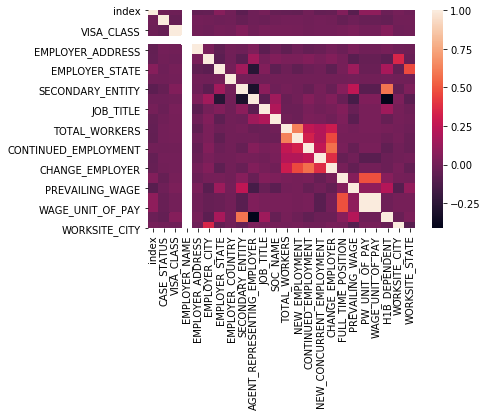

In [9]:
corrMatrix = visa_df.corr()
sns.heatmap(corrMatrix)

In [13]:
################################## Logistic Regression #######################################

In [10]:
reg = LogisticRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict_proba(x_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
reg.score(x,y)

0.9902389171210686

In [12]:
confusion_mat = confusion_matrix(y_test, y_pred[:, 1] > 0.5)
confusion_mat

array([[239120,      0],
       [  2370,      0]], dtype=int64)

In [ ]:
## There are no false negative and true negative predictions. However, there are few flase positive values.

In [17]:
######################################### Naive Bayes ########################################

In [13]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [14]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

In [15]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 241490 points : 2378


In [16]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)

In [17]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred1).sum()))

Number of mislabeled points out of a total 241490 points : 2415


In [23]:
################################ Ensemble Implementation #######################################

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.tree import plot_tree
from xgboost import plot_importance
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

In [25]:
######################################### DecisionTreeClassifier implementation ######################

In [9]:
DT_clf = DecisionTreeClassifier()
DT_clf = DT_clf.fit(x_train,y_train)
y_results = DT_clf.predict(x_test)
    
print("Training set Accuracy: {:.2f}".format(DT_clf.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(DT_clf.score(x_test , y_test)))
#print("Testing set Accuracy: {:.2f}".format(DT_clf.score(x_test , y_results)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test , y_results)))

Training set Accuracy: 1.00
Testing set Accuracy: 0.98
Mean Absolute Error: 0.02


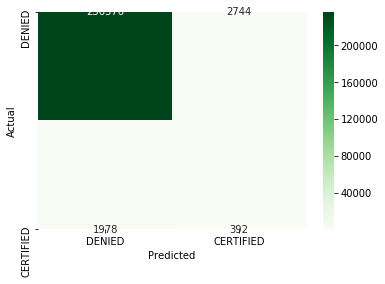

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn

# Initialize the array to zero which will store the confusion matrix
array = [[0,0],[0,0]]

# Calculate the confusion matrix
c = confusion_matrix(y_test, y_results)
# Add the score to the previous confusion matrix of previous model
array = array + c
# Create a pandas dataframe that stores the output of confusion matrix        
df = pandas.DataFrame(array, index = ['DENIED', 'CERTIFIED'], columns = ['DENIED', 'CERTIFIED'])

# Plot the heatmap
sn.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
#To check if this is overfitting I will be using few more models and also combination of models

[Text(167.4, 181.2, 'X[1] <= 0.5\ngini = 0.019\nsamples = 362234\nvalue = [358711, 3523]'),
 Text(83.7, 108.72, 'X[8] <= 0.5\ngini = 0.098\nsamples = 7183\nvalue = [6811, 372]'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'X[20] <= 0.5\ngini = 0.018\nsamples = 355051\nvalue = [351900, 3151]'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

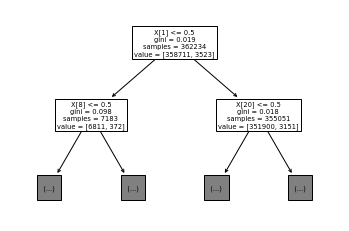

In [13]:
tree.plot_tree(DT_clf, max_depth=1)

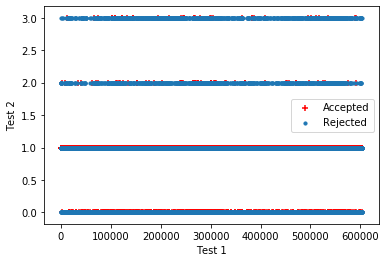

In [12]:
#x = x.values
pos , neg = (y==1).values.reshape(603724,1) , (y==0).values.reshape(603724,1)
plt.scatter(x[pos[:,0],0],x[pos[:,0],1],c="r",marker="+")
plt.scatter(x[neg[:,0],0],x[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

In [30]:
########################## Random Forest Implementation #########################

In [30]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

y_results1 = pandas.DataFrame(y_test)
y_results1['prediction'] = rf_clf.predict(x_test)
y_results1['error'] = y_results1['prediction'] - y_results1['CASE_STATUS']
y_results1.head(20)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,CASE_STATUS,prediction,error
68636,0,0,0
435513,0,0,0
241694,0,0,0
326189,0,0,0
267928,0,0,0
391659,0,0,0
232064,0,0,0
197636,0,0,0
276486,0,0,0
415469,0,0,0


In [31]:
print("Training set Accuracy: {:.2f}".format(rf_clf.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(rf_clf.score(x_test , y_test)))

Training set Accuracy: 1.00
Testing set Accuracy: 0.99


In [33]:
# As per assumption, Accuracy of Random forest model is better than decision tree 

In [39]:
############################ ADA boost classifier ############################

In [13]:
ADA_clf = AdaBoostClassifier(n_estimators = 100)
ADA_clf = ADA_clf.fit(x_train, y_train)
y_results_ADA = ADA_clf.predict(x_test)

print("Training set Accuracy: {:.2f}".format(ADA_clf.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(ADA_clf.score(x_test , y_test)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test , y_results_ADA)))

Training set Accuracy: 0.99
Testing set Accuracy: 0.99
Mean Absolute Error: 0.01


In [14]:
results = sklearn.model_selection.cross_val_score(ADA_clf, x_train, y_train, cv=5)
print(results)

[0.99026888 0.99026875 0.99026875 0.99028242 0.99028242]


In [16]:
from sklearn.metrics import accuracy_score

print('Correct Prediction: ', accuracy_score(y_test, y_results_ADA, normalize=False))
print('Total Prediction: ', x.shape[0])

Correct Prediction:  239120
Total Prediction:  603724


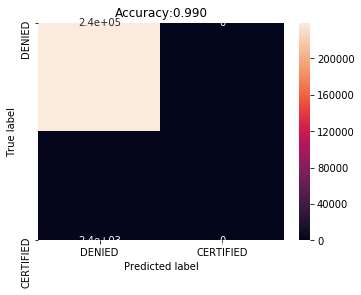

In [18]:
cm = confusion_matrix(y_test, y_results_ADA) 

cm_df = pandas.DataFrame(cm,
                     index = ['DENIED','CERTIFIED'], 
                     columns = ['DENIED','CERTIFIED'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_results_ADA)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
########### Data regularization as accuracy was 99% for above models ###########

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline


steps = [('poly', PolynomialFeatures(degree=2)),
         ('model', Lasso(alpha=0.3, fit_intercept=True))]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(x_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(x_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(x_test, y_test)))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1730.473333699552, tolerance: 0.34887361567385355
  positive)


Training score: 0.008293578102211985
Test score: 0.0076052126626015015


In [ ]:
###################### ADA boost classifier and decision tree classifier after data regularization #################################

In [11]:
ADA_clf_new = AdaBoostClassifier(n_estimators = 70).fit(x_train, y_train)
y_results_ADA1 = ADA_clf_new.predict(x_test)

print("Training set Accuracy: {:.2f}".format(ADA_clf_new.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(ADA_clf_new.score(x_test , y_test)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test , y_results_ADA1)))

Training set Accuracy: 0.99
Testing set Accuracy: 0.99
Mean Absolute Error: 0.01


In [12]:
DT_clf1 = DecisionTreeClassifier()
DT_clf1 = DT_clf1.fit(x_train,y_train)
y_results1 = DT_clf1.predict(x_test)
    
print("Training set Accuracy: {:.2f}".format(DT_clf1.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(DT_clf1.score(x_test , y_test)))
#print("Testing set Accuracy: {:.2f}".format(DT_clf.score(x_test , y_results)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test , y_results1)))

Training set Accuracy: 1.00
Testing set Accuracy: 0.98
Mean Absolute Error: 0.02


In [ ]:
############################ Decision Tree classifier with AdaBoost #####################################
 

In [22]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=45, random_state=0)
clf = clf.fit(x_train, y_train)
y_results_clf = clf.predict(x_test)

print("Training set Accuracy: {:.2f}".format(clf.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(clf.score(x_test , y_test)))

Training set Accuracy: 0.99
Testing set Accuracy: 0.99


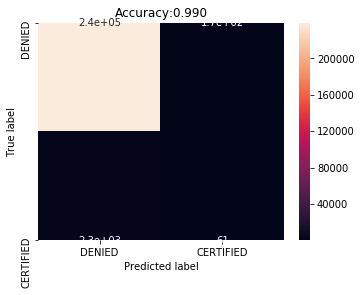

In [26]:
cm = confusion_matrix(y_test, y_results_clf) 

cm_df = pandas.DataFrame(cm,
                     index = ['DENIED','CERTIFIED'], 
                     columns = ['DENIED','CERTIFIED'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_results_clf)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
############################## Bagging classifier Implementation ##################################

In [8]:
bag_clf = BaggingClassifier().fit(x_train, y_train)

y_results_bag = bag_clf.predict(x_test)

print("Training set Accuracy: {:.2f}".format(bag_clf.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(bag_clf.score(x_test , y_test)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test , y_results_bag)))

Training set Accuracy: 0.97
Testing set Accuracy: 0.92
Mean Absolute Error: 0.16


In [9]:
results = sklearn.model_selection.cross_val_score(bag_clf, x_train, y_train, cv=5)
print(results)

[0.91552987 0.91577852 0.91635529 0.91647963 0.91440967]


In [14]:
results = sklearn.model_selection.cross_val_score(bag_clf, x_test, y_results_bag, cv=5)
print(results)

[0.97090465 0.97088584 0.97101695 0.97049032 0.97073428]


In [ ]:
############################## GradientBoosting classifier Implementation ###########################

In [ ]:
# In this model, I tried to explore many parameters, and with exponential loss and 0.3 as a learning rate, 
# I got good performance of the model (99% accuracy)

In [32]:
GB_Clf = GradientBoostingClassifier(learning_rate=0.3,n_estimators = 50, subsample=0.7).fit(x_train, y_train)

y_results_GB = GB_Clf.predict(x_test)

print("Training set Accuracy: {:.2f}".format(GB_Clf.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(GB_Clf.score(x_test , y_test)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test , y_results_GB)))

Training set Accuracy: 0.92
Testing set Accuracy: 0.92
Mean Absolute Error: 0.15


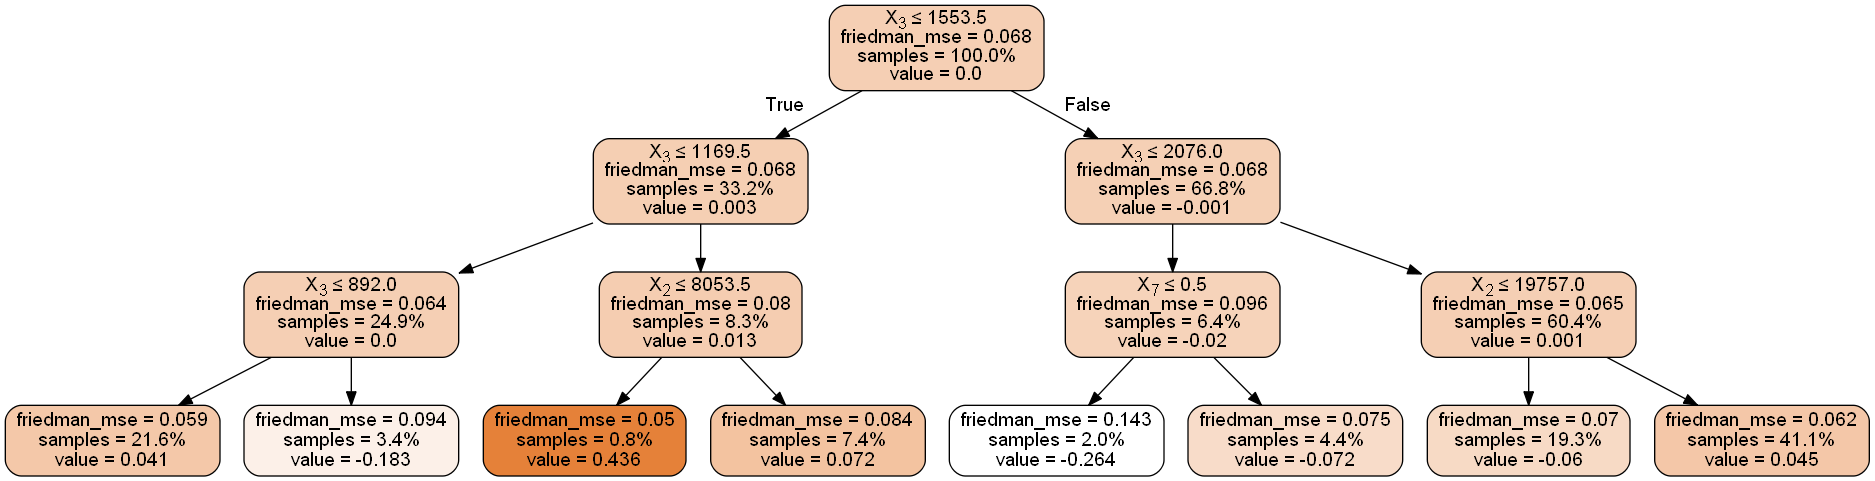

In [46]:
sub_tree_42 = GB_Clf.estimators_[42, 0]

dot_data = tree.export_graphviz(
    sub_tree_42,
    out_file=None, filled=True,
    rounded=True,  
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [ ]:
############################### XGB classifier Implementation #############################

In [34]:
XGB_clf1 = XGBClassifier().fit(x_train, y_train)
y_results_XGB1 = XGB_clf1.predict(x_test)

print("Training set Accuracy: {:.2f}".format(XGB_clf1.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(XGB_clf1.score(x_test , y_test)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test , y_results_XGB1)))

Training set Accuracy: 0.93
Testing set Accuracy: 0.93
Mean Absolute Error: 0.14


In [ ]:
################### XGB classifier with parameter tuning ########################

In [22]:
XGB_clf = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)
XGB_clf_fit = XGB_clf.fit(x_train, y_train)
y_results_XGB = XGB_clf.predict(x_test)

print("Training set Accuracy: {:.2f}".format(XGB_clf.score(x_train , y_train)))
print("Testing set Accuracy: {:.2f}".format(XGB_clf.score(x_test , y_test)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test , y_results_XGB)))

Training set Accuracy: 0.90
Testing set Accuracy: 0.90
Mean Absolute Error: 0.16


In [23]:
results = sklearn.model_selection.cross_val_score(XGB_clf_fit, x_train, y_train, cv=5)
print(results)

[0.90341792 0.9036412  0.90361612 0.90352714 0.90363878]


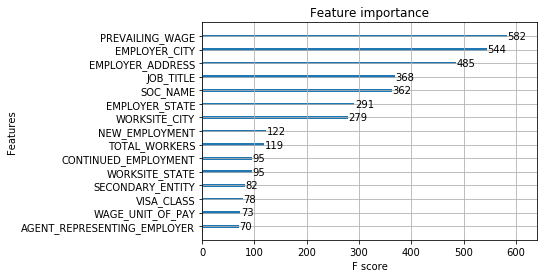

In [42]:
plot_importance(XGB_clf, max_num_features=15) # top 10 most important features
plt.show()

In [ ]:
## It is observed that, XGB classifier model with default configuration performs better than 
# model with tuning parameter for this dataset. 

In [ ]:
# Also, from feature importance graph of XGB classifier, it is clear that Prevailing_wage and Employer_city play major role in 
# analysis and it seems logical if compared with day to day life.

In [ ]:
######################### Customized ensemble ###############################

In [ ]:
# Out of all the models I tried, I got the lowest accuracy for bagging classifier and XGB classifier, 
# so I will be creating customized ensemble model with these two classifiers

In [27]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score

ensemble = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble.add([bag_clf, XGB_clf])


[MLENS] backend: threading


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...A9C73A8>)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x000002209A9C73A8>,
       shuffle=False, verbose=2)

In [28]:
ensemble.add_meta(LogisticRegression())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...A9C73A8>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x000002209A9C73A8>,
       shuffle=False, verbose=2)

In [29]:
ensemble.fit(x_train, y_train)


Fitting 2 layers
Processing layer-1             done | 00:03:06
Processing layer-2             

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


done | 00:00:02
Fit complete                        | 00:03:09


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...A9C73A8>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x000002209A9C73A8>,
       shuffle=False, verbose=2)

In [30]:
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(x_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(x_test), y_test))


Predicting 2 layers
Processing layer-1             done | 00:00:05
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:05
Accuracy - Train :  0.9004411075083569

Predicting 2 layers
Processing layer-1             done | 00:00:04
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:04
Accuracy - Test :  0.8925618591214463


In [31]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                              score-m  score-s    ft-m  ft-s  pt-m  pt-s
layer-1  baggingclassifier       0.92     0.00   73.78  1.38  3.46  0.17
layer-1  xgbclassifier           0.90     0.00  105.92  1.26  2.93  0.13



Result Analysis and Conclusion: 
1) After dropping the columns with more than average Nan values, there is not more to preprocess.
2) Decision tree and Random Forest perform pretty good for the data set
3) I obeserved that model is overfitting, hence I tried to regularize the data by using lasso
4) As per XGB classifier feature importance plot, 'Prevailing_wage' and 'Employer_city' has the high importance which can be hold true as this factors affect many other features.
5) Data cleaning and preprocessing has been done properly and hence almost all models are performing good with dataset